In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]

In [5]:
"""
1. X의 형태를 변환하여 train_X에 저장합니다.
"""
train_X = pd.DataFrame(X, columns = ['X'])

"""
2. Y의 형태를 변환하여 train_Y에 저장합니다.
"""
train_Y = pd.Series(Y)

# 변환된 데이터를 출력합니다.
print('전 처리한 X 데이터: \n {}'.format(train_X))
print('전 처리한 X 데이터 shape: {}\n'.format(train_X.shape))

print('전 처리한 Y 데이터: \n {}'.format(train_Y))
print('전 처리한 Y 데이터 shape: {}'.format(train_Y.shape))

전 처리한 X 데이터: 
           X
0  8.701538
1  3.908258
2  1.893624
3  3.287300
4  7.393330
5  2.989846
6  2.257572
7  9.844507
8  9.945895
9  5.483216
전 처리한 X 데이터 shape: (10, 1)

전 처리한 Y 데이터: 
 0    5.644131
1    3.758766
2    3.872333
3    4.409904
4    6.438450
5    4.028278
6    2.261060
7    7.157690
8    6.290974
9    5.196929
dtype: float64
전 처리한 Y 데이터 shape: (10,)


In [6]:
# 모델 초기화
lrmodel = LinearRegression()

# train data, test data 구분, train data로 학습
lrmodel.fit(train_X, train_Y)

LinearRegression()

In [10]:
from matplotlib import font_manager, rc, rcParams
rc('font', family = 'Malgun Gothic')
rcParams['font.family']

['Malgun Gothic']

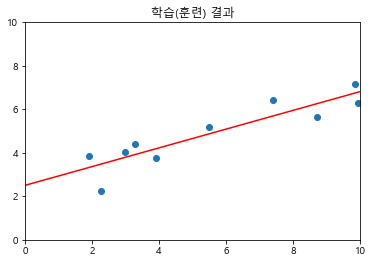

In [12]:
# 학습한 결과 시각화
plt.scatter(X,Y) # 산점도
plt.plot([0,10], [lrmodel.intercept_, 10*lrmodel.coef_[0] + lrmodel.intercept_], c = 'r')
plt.xlim(0,10)
plt.ylim(0,10)
plt.title('학습(훈련) 결과')
plt.savefig('train.png')
plt.show()

In [9]:
lrmodel.intercept_ # beta 값, 상수

2.506181170893493

In [13]:
lrmodel.coef_   # 계수

array([0.43078118])

In [16]:
lrmodel.coef_[0]

0.4307811787648282

In [18]:
beta_0 = lrmodel.intercept_  # beta 값, 상수
beta_1 = lrmodel.coef_[0]    # 계수값 (weight값)

In [19]:
print(beta_0)
print(beta_1)

2.506181170893493
0.4307811787648282


## 단순선형회귀 예측

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [21]:
X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]

train_X = pd.DataFrame(X, columns=['X'])
train_Y = pd.Series(Y)

In [22]:
lrmodel = LinearRegression()
lrmodel.fit(train_X, train_Y)

LinearRegression()

In [23]:
# train_X의 예측
pred_X = lrmodel.predict(train_X)

print('train_X 예측값:\n{}\n'.format(pred_X))
print('실제값:\n{}'.format(train_Y))

train_X 예측값:
[6.2546398  4.18978504 3.32191889 3.92228833 5.6910886  3.79415077
 3.47870087 6.74700964 6.7906856  4.86824749]

실제값:
0    5.644131
1    3.758766
2    3.872333
3    4.409904
4    6.438450
5    4.028278
6    2.261060
7    7.157690
8    6.290974
9    5.196929
dtype: float64


## 다중 선형회귀_데이터 전처리

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,FB,TV,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,FB,TV,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FB         200 non-null    float64
 1   TV         200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
"""
1. Sales 변수는 label 데이터로 Y에 저장하고 나머진 X에 저장합니다.
"""

X = df.drop(columns=['Sales'])
Y = df.Sales
print(X)
print(Y)

        FB    TV  Newspaper
0    230.1  37.8       69.2
1     44.5  39.3       45.1
2     17.2  45.9       69.3
3    151.5  41.3       58.5
4    180.8  10.8       58.4
..     ...   ...        ...
195   38.2   3.7       13.8
196   94.2   4.9        8.1
197  177.0   9.3        6.4
198  283.6  42.0       66.2
199  232.1   8.6        8.7

[200 rows x 3 columns]
0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


In [10]:
# 학습용, 테스트 셋 분리
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,test_size = 0.2, random_state=42)

In [11]:
print(train_X)
print(test_X)
print(train_Y)
print(test_Y)

        FB    TV  Newspaper
79   116.0   7.7       23.1
197  177.0   9.3        6.4
38    43.1  26.7       35.1
24    62.3  12.6       18.3
122  224.0   2.4       15.6
..     ...   ...        ...
106   25.0  11.0       29.7
14   204.1  32.9       46.0
92   217.7  33.5       59.0
179  165.6  10.0       17.6
102  280.2  10.1       21.4

[160 rows x 3 columns]
        FB    TV  Newspaper
95   163.3  31.6       52.9
15   195.4  47.7       52.9
30   292.9  28.3       43.2
158   11.7  36.9       45.2
128  220.3  49.0        3.2
115   75.1  35.0       52.7
69   216.8  43.9       27.2
170   50.0  11.6       18.4
174  222.4   3.4       13.1
45   175.1  22.5       31.5
66    31.5  24.6        2.2
182   56.2   5.7       29.7
165  234.5   3.4       84.8
78     5.4  29.9        9.4
186  139.5   2.1       26.6
177  170.2   7.8       35.2
56     7.3  28.1       41.4
152  197.6  23.3       14.2
82    75.3  20.3       32.5
68   237.4  27.5       11.0
124  229.5  32.3       74.2
16    67.8  36.6      11

In [12]:
# 학습
lrmodel = LinearRegression()
lrmodel.fit(train_X, train_Y) # 반드시, train data set

LinearRegression()

In [13]:
# 학습된 파라미터 값을 불러온다.

beta_0 = lrmodel.intercept_  # y절편 (Sales : 기본 판매량)
beta_1 = lrmodel.coef_[0]    # 1번째 변수에 대한 계수(coefficient) (FB: facebook)
beta_2 = lrmodel.coef_[1]    # TV
beta_3 = lrmodel.coef_[2]    # Newspaper

print(beta_0)
print(beta_1)
print(beta_2)
print(beta_3)

2.979067338122629
0.044729517468716326
0.18919505423437652
0.0027611143413671935


## 다중 회귀분석_예측

In [16]:
pred_X = lrmodel.predict(test_X)
pred_X

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [18]:
df1 = pd.DataFrame(np.array([[0,0,0],[1,0,0],[0,1,0],[0,0,1],[1,1,1]]), columns = ['FB', 'TV', 'Newspaper'])
df1

,FB,TV,Newspaper
0,0,0,0
1,1,0,0
2,0,1,0
3,0,0,1
4,1,1,1


In [19]:
lrmodel.predict(df1)

array([2.97906734, 3.02379686, 3.16826239, 2.98182845, 3.21575302])

## 회귀 알고리즘 평가지표
- MSE / RMSE
- MAE / MAPE
- https://mizykk.tistory.com/102

In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [21]:
# train_X, mse, mae 계산
pred_train = lrmodel.predict(train_X)
pred_test = lrmodel.predict(test_X)

MSE_train = mean_squared_error(train_Y, pred_train)
MAE_train = mean_absolute_error(train_Y, pred_train)
print('MSE_train : %f' % MSE_train)
print('MAE_train : %f' % MAE_train)

MSE_train : 2.705129
MAE_train : 1.198468


In [22]:
MSE_test = mean_squared_error(test_Y, pred_test)
MAE_test = mean_absolute_error(test_Y, pred_test)
print('MSE_test : %f' % MSE_test)
print('MAE_test : %f' % MAE_test)

MSE_test : 3.174097
MAE_test : 1.460757


In [23]:
# train_X 결정계수(R2)

R2_train = r2_score(train_Y, pred_train)
print('R2_train: %f'%R2_train)

R2_train: 0.895701


In [24]:
# test_X 예측값 계산

lrmodel.predict(test_X)

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [25]:
pred_test = lrmodel.predict(test_X)

In [26]:
R2_test = r2_score(test_Y, pred_test)
print('R2_test: %f'%R2_test)

R2_test: 0.899438
